# COSC 424/525 – Deep Learning, Spring 2026
## Homework 2: BP and NN Review

This homework, again, has ONE problem that revisits the toy example discussed in class. You will apply perceptron and multi-layer perceptron (MLP) and gain insights into how gradient descent works and how errors are propagated through the network to update weights. You must strictly follow the instructions and provide the required outputs at each step. The only file you should submit is the notebook.

Both 424/525 students will use both Mary and John's ratings, hence a 2-dimensional classification problem

**Problem:** It is Friday night and you'd like to watch a movie. You are considering "Gravity" and want to choose a movie you are likely to enjoy. You do not want to spend an hour of your weekend watching a movie only to discover that you dislike it. To help decide, you called your two friends, Mary and John, and ask for their ratings of "Gravity", which they provide. You are also aware of their ratings for 11 other movies that you have already watched and know whether you "liked" or "disliked".

**Training Data:**
- Movies that Mary rated that I liked, [2.5, 3.5, 3.5, 4.5, 4.5]
- Movies that John rated that I liked, in the same order as above, [5, 5, 4, 5, 4]
- Movies that Mary rated that I disliked, [1, 1, 1.5, 2.5, 2.5, 2.5]
- Movies that John rated that I disliked, in the same order as above, [5, 4, 4, 3, 1.5, 1]

**Testing Data:**
- Mary's rating for "Gravity" is 3
- John's rating for "Gravity" is 3

**Question:**
Should I watch "Gravity"? (or put it another way: will I "like" or "dislike" Gravity?)

You will solve the problem using two learning approaches, perceptron and MLP.

---
# **COURSE: ENTER 424 OR 525**

**Fill in your course number in the next cell (424 or 525).** Run that cell first.


In [162]:
# Set your course number: 424 or 525

### BEGIN SOLUTION
### END SOLUTION
course = 525   # Change to 424 if you are in COSC 424

print(f"Course: {course}")


Course: 525


## Approach 1: Single-layer perceptron

The following figure shows the structure of a perceptron (single-layer) to solve the classification problem of the toy example, where $x_1$ indicates Mary's rating and $x_2$ indicates John's rating, $w_1$ and $w_2$ are weights to the corresponding ratings, and $-w_0$ is the bias. The forward pass follows the following criterion:

If $w_1 x_1 + w_2 x_2 > w_0$, then $z = 1$; otherwise, $z = -1$

With minor rearranging, we have

If $w_1 x_1 + w_2 x_2 - w_0 > 0$, then $z = 1$; otherwise, $z = -1$

Using vector representation, with $\mathbf{a} = [w_1, w_2, -w_0]$ and $\mathbf{y} = [x_1, x_2, 1]$, we have

If $\mathbf{a}^T \mathbf{y} > 0$, then $z = 1$; otherwise, $z = -1$

![Perceptron Structure](perceptron_structure.png)

Note that in the above description, the output $z$ is either 1 or -1; instead of either 1 or 0. This is in part due to the design of the cost function (see (a) for more details), and in part due to the fact that it is relatively easier to differentiate between negative and positive, rather than 0 and 1.

### (a) On the objective function

The objective function of Perceptron is different (but more interesting in personal opinion) from the least square error used in MLP,

$$
J_P(\mathbf{a}) = \sum_{\mathrm{ms}} (-\mathbf{a}^T \mathbf{y})\, t
$$

where $t$ is the target value, either 1 (like) or -1 (dislike); "ms" stands for the set of misclassified samples. The cost function (or objective function), $J_P(\mathbf{a})$, actually calculates the total number of misclassified training samples. You need to provide a justification how the cost function behaves that way.

**Hint:** since "ms" only contains the misclassified samples, answer this question from two scenarios, what happens when the sample should be "liked" but misclassified as "dislike"; and what happens when the sample should be "disliked" but misclassified as "liked".

*Your justification:*

### BEGIN SOLUTION
For "liked" but misclassified as "dislike": $t=1$ and $\mathbf{a}^T \mathbf{y} < 0$, so $(-\mathbf{a}^T \mathbf{y})t > 0$. For "disliked" but misclassified as "liked": $t=-1$ and $\mathbf{a}^T \mathbf{y} > 0$, so $(-\mathbf{a}^T \mathbf{y})t > 0$. Each misclassified sample contributes a positive term; the sum counts them.
### END SOLUTION


### (b) On learning (525 only)

In the above cost function, the learning task is to find the $\mathbf{a}^*$ that minimizes $J_P(\mathbf{a})$. To do so, we use gradient descent, $\mathbf{a}^{k+1} = \mathbf{a}^k - c \cdot \nabla J_P(\mathbf{a})$ where "grad" indicates the gradient, and $c$ is the learning rate. Assume $c=1$, we then have

$$
w^{k+1} = w^k + \sum_{\mathrm{ms}} \mathbf{x}\, (T - z)
$$

$$
-w_0^{k+1} = -w_0^k + \sum_{\mathrm{ms}} (T - z)
$$

Show the detailed derivation steps that arrive at these update rules.

*Your derivation:*

### BEGIN SOLUTION
[Detailed derivation steps from JP(a) to the update rules.]
### END SOLUTION


In [163]:
# For instructor use only (auto-check). Do not remove.
### BEGIN HIDDEN TESTS
# (b) is 525-only: 424 students skip this check; 525 students are graded manually.
assert course in (424, 525), "course must be 424 or 525"
if course == 424:
    pass   # (b) is optional for 424; no auto-check
else:
    pass   # 525: (b) is manually graded
print("Tests passed.")
### END HIDDEN TESTS


Tests passed.


### (c) One-step update

Suppose the initial value of the weights are $w_1^0 = 0.3$, $w_2^0 = -0.3$, $w_0^0 = 0.1$, for an input of $[x_1, x_2] = [2.5, 5]$, and $T = 1$ (note that this is the first sample in the training set), show the updated result of $w_1^1$, $w_2^1$, $w_0^1$.

**Note:** Perceptron uses a different stopping criterion from the norm-based one: it stops when **ALL** training samples are correctly classified (i.e., the number of misclassified samples equals 0).

In [164]:
# (c) One-step update: initial w10=0.3, w20=-0.3, w00=0.1; input [2.5, 5], T=1.
# Define: z, w11, w21, w01
import numpy as np

### BEGIN SOLUTION
# Initial weights
w10 = 0.3
w20 = -0.3
w00 = 0.1

# Input sample
x1 = 2.5
x2 = 5.0
T = 1   # Target: 1 means "liked"

# Step 1: Forward pass  (compute a^T y)
a_T_y = w10 * x1 + w20 * x2 - w00

# Step 2: Classification
if a_T_y > 0:
    z = 1
else:
    z = -1

# Step 3: Update weights (perceptron learning rule)
w11 = w10 + x1 * (T - z)
w21 = w20 + x2 * (T - z)
w01 = w00 - (T - z)
### END SOLUTION

print("=== One-step update (c) ===")
print(f"a^T y = {a_T_y}")
print(f"z = {z}")
print(f"w11 = {w11}, w21 = {w21}, w01 = {w01}")


=== One-step update (c) ===
a^T y = -0.85
z = -1
w11 = 5.3, w21 = 9.7, w01 = -1.9


In [165]:
# For instructor use only (auto-check). Do not remove.
### BEGIN HIDDEN TESTS
import numpy as np
def test_one_step():
    tol = 1e-5
    assert np.allclose(w11, 5.3, atol=tol), f"w11 should be 5.3, got {w11}"
    assert np.allclose(w21, 9.7, atol=tol), f"w21 should be 9.7, got {w21}"
    assert np.allclose(w01, -1.9, atol=tol), f"w01 should be -1.9, got {w01}"
test_one_step()
print("Tests passed.")
### END HIDDEN TESTS


Tests passed.


### (d) One epoch of online learning

One epoch means one full pass through all 11 samples in the training set, that is, 11 iterations. There are two updating schemes: **batch update** vs. **online update**.

- **Online learning**: update weights after each individual sample (i.e., at the end of each iteration).
- **Batch learning**: accumulate the errors across all samples and only update the weights at the end of each epoch.

In this approach, we choose **online learning**. Repeat (c) to iterate through all the 11 samples in the training set (one epoch).

Provide a scatter plot of all the 11 samples. On the same figure, plot the **initial decision boundary** and the **decision boundary after the first epoch**.

**Hint:** The decision boundary is essentially $\mathbf{a}^T \mathbf{y} = 0$ or $w_1 x_1 + w_2 x_2 - w_0 = 0$, which is a line. Use the initial $w$'s given in (c) to plot the initial boundary. Use the updated $w$'s at the end of the first epoch to plot the updated boundary.

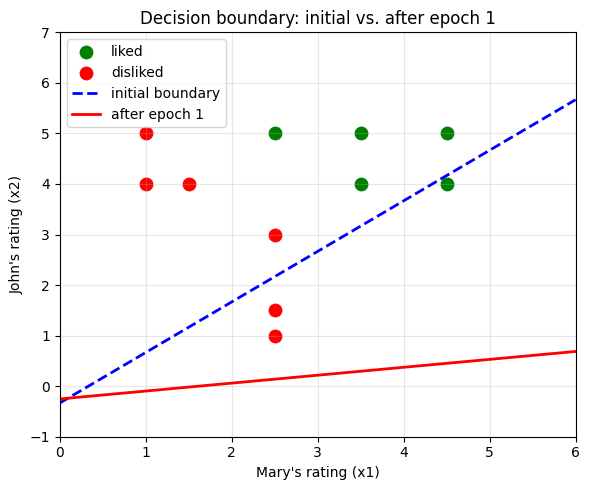

=== After epoch 1 (d) ===
w1_epoch1 = 1.2999999999999998, w2_epoch1 = -8.3, w0_epoch1 = 2.1


In [166]:
# (d) One epoch of online learning through all 11 samples.
# Define: w1_epoch1, w2_epoch1, w0_epoch1
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
# Training data
mary_liked = [2.5, 3.5, 3.5, 4.5, 4.5]
john_liked = [5, 5, 4, 5, 4]
mary_disliked = [1, 1, 1.5, 2.5, 2.5, 2.5]
john_disliked = [5, 4, 4, 3, 1.5, 1]

# Combine into arrays: each row is [mary_rating, john_rating]
X_liked = np.column_stack([mary_liked, john_liked])
X_disliked = np.column_stack([mary_disliked, john_disliked])
X = np.vstack([X_liked, X_disliked])
T_labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

# Initial weights (same as in c)
w1 = 0.3
w2 = -0.3
w0 = 0.1

# Save initial weights for plotting
w1_init = w1
w2_init = w2
w0_init = w0

# One epoch of online learning: process each sample one at a time
for i in range(len(X)):
    x1 = X[i, 0]    # Mary's rating
    x2 = X[i, 1]    # John's rating
    T = T_labels[i]  # Target label

    # Forward pass
    a_T_y = w1 * x1 + w2 * x2 - w0
    if a_T_y > 0:
        z = 1
    else:
        z = -1

    # Update weights only if misclassified
    if z != T:
        w1 = w1 + x1 * (T - z)
        w2 = w2 + x2 * (T - z)
        w0 = w0 - (T - z)

# Save weights after first epoch
w1_epoch1 = w1
w2_epoch1 = w2
w0_epoch1 = w0

# --- Plotting ---
plt.figure(figsize=(6, 5))
plt.scatter(X_liked[:, 0], X_liked[:, 1], c='green', label='liked', s=80)
plt.scatter(X_disliked[:, 0], X_disliked[:, 1], c='red', label='disliked', s=80)

x_plot = np.linspace(0, 6, 100)

# Initial decision boundary: w1*x1 + w2*x2 - w0 = 0  =>  x2 = (w0 - w1*x1) / w2
if abs(w2_init) > 0.0001:
    y_init = (w0_init - w1_init * x_plot) / w2_init
    plt.plot(x_plot, y_init, 'b--', lw=2, label='initial boundary')

# Decision boundary after epoch 1
if abs(w2_epoch1) > 0.0001:
    y_ep1 = (w0_epoch1 - w1_epoch1 * x_plot) / w2_epoch1
    plt.plot(x_plot, y_ep1, 'r-', lw=2, label='after epoch 1')

plt.xlabel("Mary's rating (x1)")
plt.ylabel("John's rating (x2)")
plt.legend()
plt.title("Decision boundary: initial vs. after epoch 1")
plt.xlim(0, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
### END SOLUTION

print("=== After epoch 1 (d) ===")
print(f"w1_epoch1 = {w1_epoch1}, w2_epoch1 = {w2_epoch1}, w0_epoch1 = {w0_epoch1}")


In [167]:
# For instructor use only (auto-check). Do not remove.
### BEGIN HIDDEN TESTS
import numpy as np
def test_one_epoch():
    # Re-run one epoch of online learning to get expected weights
    _X_liked = np.column_stack([[2.5, 3.5, 3.5, 4.5, 4.5], [5, 5, 4, 5, 4]])
    _X_disliked = np.column_stack([[1, 1, 1.5, 2.5, 2.5, 2.5], [5, 4, 4, 3, 1.5, 1]])
    _X = np.vstack([_X_liked, _X_disliked])
    _t = np.array([1]*5 + [-1]*6)
    _w1, _w2, _w0 = 0.3, -0.3, 0.1
    for i in range(len(_X)):
        _aTy = _w1*_X[i,0] + _w2*_X[i,1] - _w0
        _z = 1 if _aTy > 0 else -1
        if _z != _t[i]:
            _w1 += _X[i,0] * (_t[i] - _z)
            _w2 += _X[i,1] * (_t[i] - _z)
            _w0 -= (_t[i] - _z)
    tol = 1e-5
    assert np.allclose(w1_epoch1, _w1, atol=tol), f"w1_epoch1 expected {_w1}, got {w1_epoch1}"
    assert np.allclose(w2_epoch1, _w2, atol=tol), f"w2_epoch1 expected {_w2}, got {w2_epoch1}"
    assert np.allclose(w0_epoch1, _w0, atol=tol), f"w0_epoch1 expected {_w0}, got {w0_epoch1}"
test_one_epoch()
print("Tests passed.")
### END HIDDEN TESTS


Tests passed.


### (e) Stopping criterion

Repeat (d) for multiple epochs (maximum 150 epochs). In each epoch, re-accumulate the number of misclassified samples. At the end of each epoch, check if the number of misclassified samples equals 0. If it does, then stop the learning early; otherwise, stop after the maximum preset epochs (150 epochs).

Redo the scatter plot as you did in (d). On the same figure, for every 20 epochs (20, 40, 60, 80, 100, ...  unless you had early stop), plot the decision boundary at the end of that epoch using the updated $w$'s.

Converged at epoch 120! All samples correctly classified.


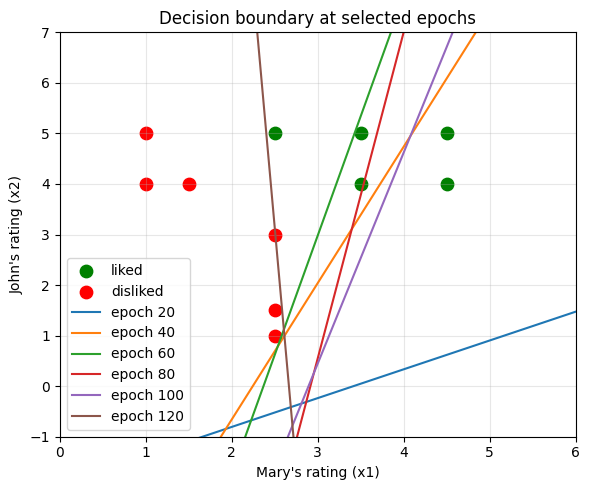

=== Perceptron final weights (e) ===
w1_final = 32.3, w2_final = 1.6999999999999993, w0_final = 86.1


In [168]:
# (e) Run up to 150 epochs of online learning. Stop early if 0 misclassified.
# Define: w1_final, w2_final, w0_final, boundaries_at_epochs
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
# Start fresh with initial weights
w1 = 0.3
w2 = -0.3
w0 = 0.1

max_epochs = 150
boundaries_at_epochs = {}  # dictionary: epoch_number -> (w1, w2, w0)

for epoch in range(1, max_epochs + 1):
    num_misclassified = 0   # count misclassified samples in this epoch

    # Process all 11 samples (online learning)
    for i in range(len(X)):
        x1 = X[i, 0]
        x2 = X[i, 1]
        T = T_labels[i]

        # Forward pass
        a_T_y = w1 * x1 + w2 * x2 - w0
        if a_T_y > 0:
            z = 1
        else:
            z = -1

        # Update weights if misclassified
        if z != T:
            num_misclassified = num_misclassified + 1
            w1 = w1 + x1 * (T - z)
            w2 = w2 + x2 * (T - z)
            w0 = w0 - (T - z)

    # Save boundary at every 20 epochs
    if epoch % 20 == 0:
        boundaries_at_epochs[epoch] = (w1, w2, w0)

    # Stopping criterion: stop if all samples are correctly classified
    if num_misclassified == 0:
        print(f"Converged at epoch {epoch}! All samples correctly classified.")
        boundaries_at_epochs[epoch] = (w1, w2, w0)
        break

if num_misclassified > 0:
    print(f"Did not converge after {max_epochs} epochs. Misclassified in last epoch: {num_misclassified}")

# Final weights
w1_final = w1
w2_final = w2
w0_final = w0

# --- Plot decision boundaries at selected epochs ---
plt.figure(figsize=(6, 5))
plt.scatter(X_liked[:, 0], X_liked[:, 1], c='green', label='liked', s=80)
plt.scatter(X_disliked[:, 0], X_disliked[:, 1], c='red', label='disliked', s=80)

x_plot = np.linspace(0, 6, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for idx, ep in enumerate(sorted(boundaries_at_epochs.keys())):
    w1e, w2e, w0e = boundaries_at_epochs[ep]
    if abs(w2e) > 0.0001:
        y_line = (w0e - w1e * x_plot) / w2e
        plt.plot(x_plot, y_line, color=colors[idx % len(colors)], lw=1.5, label=f'epoch {ep}')

plt.xlabel("Mary's rating (x1)")
plt.ylabel("John's rating (x2)")
plt.legend()
plt.title("Decision boundary at selected epochs")
plt.xlim(0, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
### END SOLUTION

print("=== Perceptron final weights (e) ===")
print(f"w1_final = {w1_final}, w2_final = {w2_final}, w0_final = {w0_final}")


In [169]:
# For instructor use only (auto-check). Do not remove.
### BEGIN HIDDEN TESTS
import numpy as np
def test_perceptron_final():
    # Re-run the exact same online perceptron to get expected final weights
    _X_liked = np.column_stack([[2.5, 3.5, 3.5, 4.5, 4.5], [5, 5, 4, 5, 4]])
    _X_disliked = np.column_stack([[1, 1, 1.5, 2.5, 2.5, 2.5], [5, 4, 4, 3, 1.5, 1]])
    _X = np.vstack([_X_liked, _X_disliked])
    _t = np.array([1]*5 + [-1]*6)
    _w1, _w2, _w0 = 0.3, -0.3, 0.1
    for epoch in range(150):
        _mis = 0
        for i in range(len(_X)):
            _aTy = _w1*_X[i,0] + _w2*_X[i,1] - _w0
            _z = 1 if _aTy > 0 else -1
            if _z != _t[i]:
                _mis += 1
                _w1 += _X[i,0] * (_t[i] - _z)
                _w2 += _X[i,1] * (_t[i] - _z)
                _w0 -= (_t[i] - _z)
        if _mis == 0:
            break
    tol = 1e-5
    assert np.isfinite(w1_final) and np.isfinite(w2_final) and np.isfinite(w0_final), "Final weights must be finite"
    assert np.allclose(w1_final, _w1, atol=tol), f"w1_final expected {_w1}, got {w1_final}"
    assert np.allclose(w2_final, _w2, atol=tol), f"w2_final expected {_w2}, got {w2_final}"
    assert np.allclose(w0_final, _w0, atol=tol), f"w0_final expected {_w0}, got {w0_final}"
test_perceptron_final()
print("Tests passed.")
### END HIDDEN TESTS


Tests passed.


### (f) Gravity prediction

Using your trained perceptron weights (`w1_final`, `w2_final`, `w0_final`), predict whether you will "like" or "dislike" Gravity. Mary's rating for Gravity is 3, John's rating is 3. Set `gravity_prediction` to 1 for "like" or -1 for "dislike".

In [170]:
# (f) Gravity prediction (Mary=3, John=3). Define: gravity_prediction (1 or -1).

### BEGIN SOLUTION
gravity_mary = 3.0
gravity_john = 3.0

# Forward pass with final weights
a_T_y = w1_final * gravity_mary + w2_final * gravity_john - w0_final

if a_T_y > 0:
    gravity_prediction = 1
else:
    gravity_prediction = -1
### END SOLUTION

print("=== Gravity prediction (f) ===")
print(f"a^T y = {a_T_y}")
print(f"gravity_prediction (1=like, -1=dislike): {gravity_prediction}")


=== Gravity prediction (f) ===
a^T y = 15.899999999999991
gravity_prediction (1=like, -1=dislike): 1


In [171]:
# For instructor use only (auto-check). Do not remove.
### BEGIN HIDDEN TESTS
import numpy as np
def test_gravity():
    expected = 1 if (w1_final * 3 + w2_final * 3 - w0_final) > 0 else -1
    assert gravity_prediction in (1, -1), "gravity_prediction must be 1 or -1"
    assert gravity_prediction == expected, f"gravity_prediction should be {expected} given your weights"
test_gravity()
print("Tests passed.")
### END HIDDEN TESTS


Tests passed.


### (g) Compare decision boundaries

1. Provide a clean scatter plot of the samples.
2. On this plot, draw the **final decision boundary from Perceptron** (from part e).
3. On the same plot, draw the **decision boundary from the minimum distance classifier** (as you did in HW1).

**Hint:** The minimum distance classifier boundary is given by $\|\mathbf{x} - \mathbf{m}_1\| = \|\mathbf{x} - \mathbf{m}_2\|$, where $\mathbf{x} = [x_1, x_2]^T$, $\mathbf{m}_1 = [m_{11}, m_{12}]^T$ (mean of liked), and $\mathbf{m}_2 = [m_{21}, m_{22}]^T$ (mean of disliked). This leads to:

$$(-2 m_{11} + 2 m_{21}) x_1 + (-2 m_{12} + 2 m_{22}) x_2 + (m_{11}^2 + m_{12}^2 - m_{21}^2 - m_{22}^2) = 0$$

which is a line.


m1 (liked mean) = [3.7 4.6]
m2 (disliked mean) = [1.83333333 3.08333333]


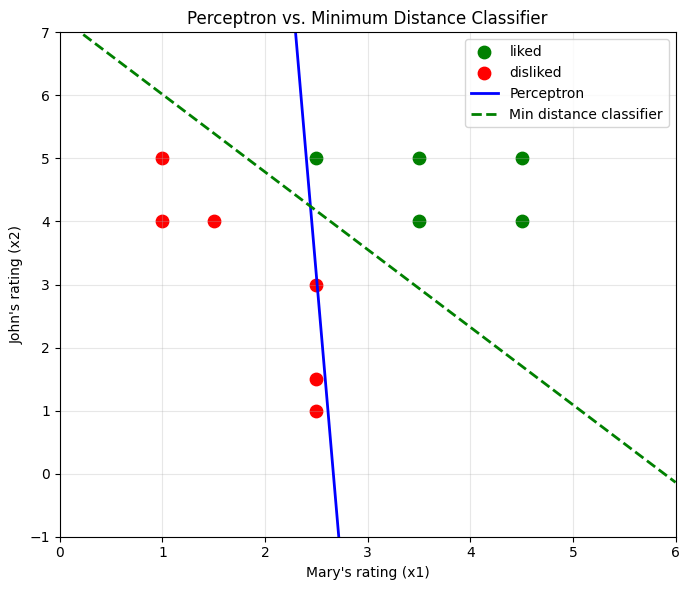

In [172]:
# (g) Compare decision boundaries: Perceptron vs. minimum distance classifier.
# Define: m1, m2 (mean vectors of liked and disliked classes)
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
# --- Compute means for minimum distance classifier ---
m1 = np.mean(X_liked, axis=0)    # mean of liked samples: [mean_mary, mean_john]
m2 = np.mean(X_disliked, axis=0) # mean of disliked samples

print(f"m1 (liked mean) = {m1}")
print(f"m2 (disliked mean) = {m2}")

# Minimum distance boundary coefficients:
# (-2*m1[0]+2*m2[0])*x1 + (-2*m1[1]+2*m2[1])*x2 + (m1[0]^2+m1[1]^2-m2[0]^2-m2[1]^2) = 0
# i.e.  A*x1 + B*x2 + C = 0   =>   x2 = -(A*x1 + C) / B
A = -2 * m1[0] + 2 * m2[0]
B = -2 * m1[1] + 2 * m2[1]
C = m1[0]**2 + m1[1]**2 - m2[0]**2 - m2[1]**2

# --- Plotting ---
plt.figure(figsize=(7, 6))
plt.scatter(X_liked[:, 0], X_liked[:, 1], c='green', label='liked', s=80)
plt.scatter(X_disliked[:, 0], X_disliked[:, 1], c='red', label='disliked', s=80)

x_plot = np.linspace(0, 6, 100)

# Perceptron decision boundary (from part e)
if abs(w2_final) > 0.0001:
    y_perceptron = (w0_final - w1_final * x_plot) / w2_final
    plt.plot(x_plot, y_perceptron, 'b-', lw=2, label='Perceptron')

# Minimum distance classifier boundary
if abs(B) > 0.0001:
    y_min_dist = -(A * x_plot + C) / B
    plt.plot(x_plot, y_min_dist, 'g--', lw=2, label='Min distance classifier')

plt.xlabel("Mary's rating (x1)")
plt.ylabel("John's rating (x2)")
plt.legend()
plt.title("Perceptron vs. Minimum Distance Classifier")
plt.xlim(0, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
### END SOLUTION


In [173]:
# For instructor use only (auto-check). Do not remove.
### BEGIN HIDDEN TESTS
import numpy as np
def test_compare_boundaries():
    _X_liked = np.column_stack([[2.5, 3.5, 3.5, 4.5, 4.5], [5, 5, 4, 5, 4]])
    _X_disliked = np.column_stack([[1, 1, 1.5, 2.5, 2.5, 2.5], [5, 4, 4, 3, 1.5, 1]])
    _m1 = np.mean(_X_liked, axis=0)
    _m2 = np.mean(_X_disliked, axis=0)
    tol = 1e-5
    assert np.allclose(m1, _m1, atol=tol), f"m1 expected {_m1}, got {m1}"
    assert np.allclose(m2, _m2, atol=tol), f"m2 expected {_m2}, got {m2}"
test_compare_boundaries()
print("Tests passed.")
### END HIDDEN TESTS


Tests passed.


### Bonus: 1NN decision boundary

**(Bonus, +10 points for both 424 and 525):** On the same figure, plot the decision boundary for 1NN. Note that since 1NN is non-parametric, you cannot find an explicit function to plot the decision boundary.

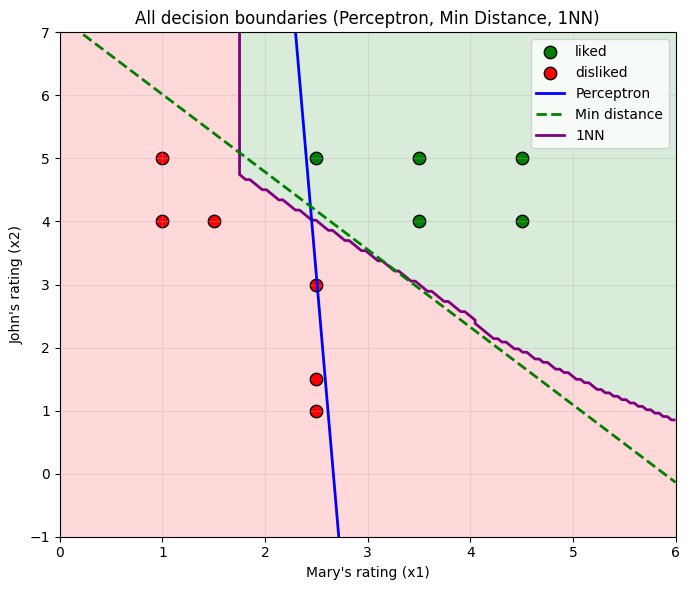

In [174]:
# (g) Bonus: 1NN decision boundary on the same comparison plot.
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
# Create a grid of points to classify with 1NN
x1_grid = np.linspace(0, 6, 150)
x2_grid = np.linspace(-1, 7, 150)
xx, yy = np.meshgrid(x1_grid, x2_grid)

# For each grid point, find the nearest training sample
grid_predictions = np.zeros(xx.shape)
for row in range(xx.shape[0]):
    for col in range(xx.shape[1]):
        # Distance from this grid point to every training sample
        distances = np.sqrt((X[:, 0] - xx[row, col])**2 + (X[:, 1] - yy[row, col])**2)
        nearest_index = np.argmin(distances)
        grid_predictions[row, col] = T_labels[nearest_index]

# --- Plot all three boundaries together ---
plt.figure(figsize=(7, 6))

# 1NN regions (background shading)
plt.contourf(xx, yy, grid_predictions, alpha=0.15, levels=[-2, 0, 2], colors=['red', 'green'])
# 1NN boundary line
plt.contour(xx, yy, grid_predictions, levels=[0], colors='purple', linewidths=2)

# Data points
plt.scatter(X_liked[:, 0], X_liked[:, 1], c='green', label='liked', s=80, edgecolors='black')
plt.scatter(X_disliked[:, 0], X_disliked[:, 1], c='red', label='disliked', s=80, edgecolors='black')

x_plot = np.linspace(0, 6, 100)

# Perceptron boundary
if abs(w2_final) > 0.0001:
    y_perceptron = (w0_final - w1_final * x_plot) / w2_final
    plt.plot(x_plot, y_perceptron, 'b-', lw=2, label='Perceptron')

# Minimum distance boundary
A = -2 * m1[0] + 2 * m2[0]
B = -2 * m1[1] + 2 * m2[1]
C = m1[0]**2 + m1[1]**2 - m2[0]**2 - m2[1]**2
if abs(B) > 0.0001:
    y_min_dist = -(A * x_plot + C) / B
    plt.plot(x_plot, y_min_dist, 'g--', lw=2, label='Min distance')

# Dummy handle for 1NN legend entry
plt.plot([], [], color='purple', lw=2, label='1NN')

plt.xlabel("Mary's rating (x1)")
plt.ylabel("John's rating (x2)")
plt.legend()
plt.title("All decision boundaries (Perceptron, Min Distance, 1NN)")
plt.xlim(0, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
### END SOLUTION
